# Homework 4. Statistical hypothesis testing 

## Setting


In [10]:
import numpy as np
from scipy import stats

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)

# Task 1

За твердженням компанiї «Ухань медiкалз», її новi лiки знижують рiвень холестеролу в кровi на 18 одиниць. 
Було проведено випробування на 60 пацiєнтах, середнє зниження склало 17.3 одиницi, середньоквадратичне вiдхилення 
4 одиницi. Чи можна на рiвнi значущостi 1% спростувати твердження компанiї?

З припущення, що величина, на яку знижується холестерол, розподілена нормально, проведемо тест Стьюдента на рівність середнього 

$$H_0: \mu = 18, \quad \alpha = 0.01$$

З вимірів маємо $\bar{X} = 17.3$, $\hat{\sigma} = 4$

Тоді статистика тесту $\hat{T} = \sqrt{n}\cdot\frac{\bar{X} - \mu_0}{\hat{\sigma}}$

In [58]:
x = 17.3
mu = 18
sig = 4
n = 60
T = n**0.5 * (x-mu) / sig
T

-1.3555441711725946

In [59]:
alpha = 0.01

In [60]:
pval = 2*stats.t.cdf(-abs(T), df=n-1)
pval

0.18041075552717978

$p$-value більше за $\alpha$, тому твердження компанії не спростовується

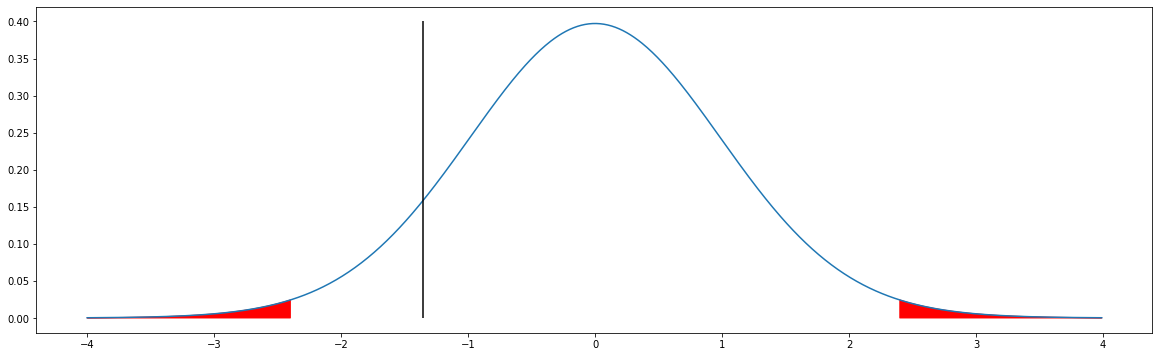

In [62]:
alpha = 0.01
x = np.arange(-4, 4, 0.01)
p = stats.t.pdf(x, df=n-1)
plt.plot(x, p)
plt.vlines(x=T, ymin=0, ymax=0.4, color='black')
a = stats.t.ppf(alpha, df=n-1)
plt.fill_between(x, 0, p, where=(x<a)|(x > abs(a)), color='red')
plt.show()

## Task 2

В результатi вимiрювання зросту 12 дорослих японцiв та 12 дорослих англiйцiв визначили, 
що середнiй зрiст японцiв становить 167,5 см iз середньоквадратичним вiдхиленням 7,5 см, 
а середнiй зрiст англiйцiв становить 175 см iз середньоквадратичним вiдхиленням 5 см.

а) Чи можна стверджувати на рiвнi значущостi 5%, що англiйцi вищi, нiж японцi?

б) Проаналiзуйте використанi вами припущення.

Маємо гіпотезу 

$$H_0: \mu_X < \mu_Y$$

Припущення:
1. Зріст -- нормальна випадкова величина
2. $X$, $Y$  незалежні
3. $X$, $Y$ мають однакову дисперсію

$$X \sim \mathcal{N}(\mu_X, \sigma^2),\qquad Y \sim \mathcal{N} (\mu_Y, \sigma^2)$$

Проведемо тест Стьюдента з рівнем значущості $\alpha = 0.05$

$$s_p^2 = \frac{n\cdot \hat{\sigma}_x^2 + m\cdot \hat{\sigma}_y^2}{n+m-2} \approx 44.32 $$

In [16]:
sigx = 7.5
n = 12
sigy = 5
m = 12
sp2 = (n*sigx**2 + m*sigy**2) / (n+m-2)
sp2

44.31818181818182

Статистика тесту

$$\hat{T} = \frac{\bar{X}-\bar{Y}}{\sqrt{\frac{s_p^2}n + \frac{s_p^2}m}}$$

In [17]:
X = 167.5
Y = 175
T = (X - Y) / (sp2/n + sp2/m) ** 0.5
T

-2.7595986330233995

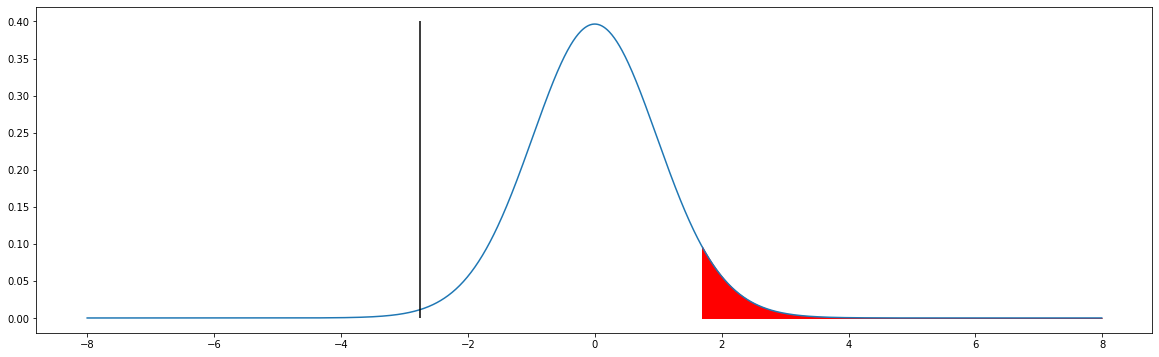

In [52]:
alpha = 0.05
x = np.arange(-8, 8, 0.01)
p = stats.t.pdf(x, df=m+n-2)
plt.plot(x, p)
plt.vlines(x=T, ymin=0, ymax=0.4, color='black')
a = stats.t.ppf(1-alpha, df=m+n-2)
plt.fill_between(x, 0, p, where=(x > a), color='red')
plt.show()

In [28]:
pval = 1 - stats.t.cdf(T, df=n+m-2)
pval

0.994282097730297

Значення статистики не потрапляє в критичну область, отже, гіпотеза не відхиляється 

Припущення про нормальність зросту звучить змістовно, як і інші припущення про нормальність складних фізичних систем (якийсь натяк на CLT). Незалежність росту також може мати місце. А ось припущення щодо рівності дисперсій залишається під питанням. Більш правильно було б робити тест без цього припущення, але тоді вираз для degrees of freedom був би трошки гірше. 

## Task 3

Компанiя виробляє диски для автомобiльних колiс рiзного дiаметру. Для
порiвняння якостi було взято 18 дискiв номiнального дiаметру 17” та 25 дискiв
номiнального дiаметру 18”. Виявилося, що вибiрковi середньоквадратичне вiдхилення 
дiаметру для першої групи становить 0.1”, для другої — 0.2”. На рiвнi
значущостi 5 % перевiрте гiпотезу про те, що середньоквадратичнi вiдхилення
для дискiв рiзного дiаметру вiдрiзняються.

$$H_0: \sigma_x = \sigma_y, \qquad \alpha = 0.05$$

In [30]:
n = 18
m = 25

In [31]:
sigx = 0.1
sigy = 0.2

In [32]:
sx = sigx * n / (n - 1)
sy = sigy * m / (m - 1)

$$F = \frac{S_x^2}{S_y^2}$$

In [34]:
F = sx**2 / sy ** 2  
F

0.25830311418685115

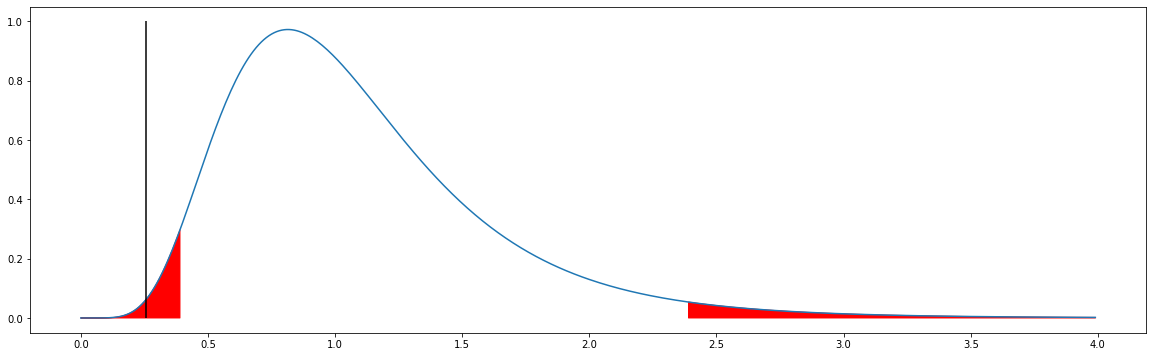

In [51]:
alpha = 0.05
x = np.arange(0, 4, 0.01)
p = stats.f.pdf(x, dfn=n-1, dfd=m-1)
plt.plot(x, p)
plt.vlines(x=F, ymin=0, ymax=1, color='black')
a = stats.f.ppf(alpha/2, dfn=n-1, dfd=m-1)
b = stats.f.ppf(1-alpha/2, dfn=n-1, dfd=m-1)
plt.fill_between(x, 0, p, where=(x < a)| (x > b), color='red')
plt.show()

Значення статистики потрапляє в критичну область, отже, нульова гіпотеза відхиляється, тому середьноквадратичні відхилення для дисків різних діаметрів різні.

## Task 4

За допомогою онлайн-генератора змоделюйте показники температури пацiєнтiв лiкарнi 
до та пiсля лiкування; отриманi вибiрки позначимо $X$ та $Y$. 
Вважається, що показники температури до лiкування мають нормальний розподiл з параметрами 
$\mathcal{N}(\mu_X, \sigma^2)$, пiсля лiкування -- нормальний розподiл з параметрами $\mathcal{N}(\mu_Y, \sigma^2)$

а) Побудуйте (точний) 95 %-й довiрчий iнтервал для середнього значення температури до лiкування.

б) За припущення незалежностi вибiрок X та Y сумiсна виправлена дисперсiя

$$s_p^2 = \frac1{48} \left(\sum_{k=1}^{25} (X_k-\bar{X})^2 + \sum_{k=1}^{25} (Y_k-\bar{Y})^2\right)$$

має розподiл $\sigma^2\chi_{48}^2$ (Можна це довести, проте це не обов’язково.) Враховуючи цю iнформацiю, побудуйте (точний) 95 %-й правостороннiй довiрчий iнтервал
для $\sigma^2$

в) Побудуйте (точний) 95 %-й лiвостороннiй довiрчий iнтервал для рiзницi
середнiх $\mu_X-\mu_Y$. Зробiть вiдповiдний висновок про ефективнiсть лiкування
(перевiрте вiдповiдну гiпотезу).

г) Наскiльки реалiстичними є зробленi припущення (кратнi вибiрки, нормаль-
ний розподiл, однаковi дисперсiї, незалежнiсть X та Y )?

In [84]:
X = [3.7590e+1,3.7050e+1,3.6510e+1,3.8690e+1,3.8540e+1,3.7820e+1,
     3.8550e+1,3.8300e+1,3.6990e+1,3.8450e+1,3.9030e+1,3.8060e+1,
     3.7400e+1,3.8030e+1,3.8160e+1,3.7070e+1,3.8470e+1,3.8380e+1,
     3.6830e+1,3.7890e+1,3.8400e+1,3.6070e+1,3.8500e+1, 3.8980e+1, 3.9400e+1,]
X = np.array(X)

In [85]:
Y = [3.5800e+1,3.5710e+1,3.5310e+1,3.6420e+1,3.7240e+1,3.6730e+1,
     3.5810e+1,3.7720e+1,3.7180e+1,3.7130e+1,3.5660e+1,3.6040e+1,
     3.7980e+1,3.6770e+1,3.6260e+1,3.5230e+1,3.7830e+1,3.7070e+1,
     3.7330e+1,3.6110e+1,3.5610e+1,3.8520e+1,3.6080e+1,3.4800e+1,3.5480e+1,]
Y = np.array(Y)

### A

$$\displaystyle \mu \in \left[{\hat {\mu }}-t_{n-1,1-\alpha /2}{\frac {1}{\sqrt {n}}}s,{\hat {\mu }}+t_{n-1,1-\alpha /2}{\frac {1}{\sqrt {n}}}s\right]$$

In [112]:
n = 25
alpha = 0.05
s = X.std(ddof=1) 
ta = stats.t.ppf(1-alpha/2, df=n-1)
d = ta * s / n**0.5 

In [113]:
m = X.mean()
(m - d, m + d)

(37.158615657089435, 37.861606982110565)

### B

$$s_p^2 = \frac1{48} \left(\sum_{k=1}^{25} (X_k-\bar{X})^2 + \sum_{k=1}^{25} (Y_k-\bar{Y})^2\right) \sim \sigma^2 \chi_{48}^2$$


In [135]:
sp2 = 1/(2*n-2) * (n * X.var() + n * Y.var())
sp2

0.835627463796603